# IMPORTING LIBRARIES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Mobile_data.csv')
data.shape

(2000, 15)

In [28]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

# MISSING VALUES

In [29]:
data.isnull().sum().head()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
dtype: int64

# OUTLIERS

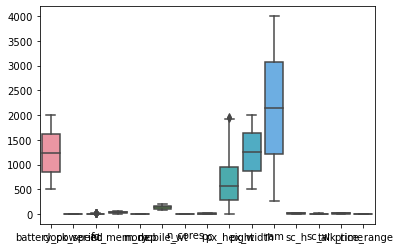

In [30]:
sns.boxplot(data = data)

# datatypes

In [31]:
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [32]:
data.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

# functions 

In [33]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confusion_matrices(model):
    cm = confusion_matrix(y_test,y_predict)
    cm_df = pd.DataFrame(data = cm, columns=['predict_0', 'predict_1','predict_2','predict_3'], index = ['actual 0',' actual_1','actual_2','actual_3'])
    sns.heatmap(data = cm_df, annot = True,fmt = 'd', annot_kws = {'size': 25}, cbar = False , cmap = ListedColormap(['lightskyblue']), linewidths = 0.5)

In [34]:
from sklearn.metrics import classification_report
def report(model):
    return print(classification_report(y_test,y_predict))

# MODEL - 1 distribution of data

In [35]:
y = pd.DataFrame(data['price_range'])
x = data.drop(['price_range'], axis = 1)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7,random_state= 1)


In [37]:
def shape(x_train,x_test,y_train,y_test):
    print('x_train : ', x_train.shape)
    print('x_test :', x_test.shape)
    print('y_train :', y_train.shape)
    print('y_test :', y_test.shape)

In [38]:
shape(x_train,x_test,y_train,y_test)

x_train :  (1400, 14)
x_test : (600, 14)
y_train : (1400, 1)
y_test : (600, 1)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_classifier.fit(x_train,y_train)

In [40]:
y_predict = knn_model.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns=['y_predict'])

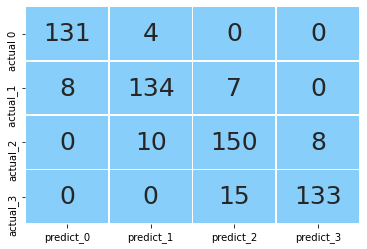

In [41]:
confusion_matrices(knn_model)

In [42]:
report(knn_model)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       135
           1       0.91      0.90      0.90       149
           2       0.87      0.89      0.88       168
           3       0.94      0.90      0.92       148

    accuracy                           0.91       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.91      0.91      0.91       600



In [43]:
from sklearn import metrics

In [18]:
model_1 = metrics.accuracy_score(y_test,y_predict)

# MODEL-2 using grid search

In [44]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [45]:
tuned_parameters = [{'n_neighbors':[3,5,7],'metric':['euclidean','manhattan']}]
grid = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = tuned_parameters, cv = 5,scoring='accuracy')
grid_param  = grid.fit(x_train,y_train)
grid_param.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [46]:
knn = KNeighborsClassifier(metric =  'manhattan', n_neighbors  =  7)
grid_mdl = knn.fit(x_train,y_train)

In [47]:
y_predict = grid_mdl.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns = ['y_predict'])

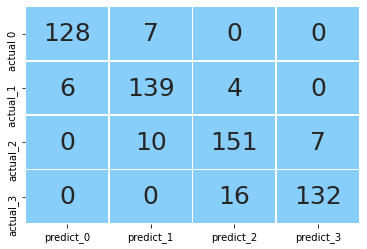

In [48]:
confusion_matrices(grid_mdl)

In [49]:
report(grid_mdl)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       135
           1       0.89      0.93      0.91       149
           2       0.88      0.90      0.89       168
           3       0.95      0.89      0.92       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [50]:
from sklearn import metrics

In [51]:
model_2 = metrics.accuracy_score(y_test,y_predict)

# MODEL-3 selecting n_neighbour with grid search

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [53]:
for i in np.arange(1,30,2):
    knn = KNeighborsClassifier(i, metric = 'manhattan')
    score = cross_val_score(knn, x_train,y_train,cv = 6)

In [54]:
knn = KNeighborsClassifier(5, metric = 'manhattan')
cross_val_score(knn, x_train,y_train,cv = 6)

array([0.8974359 , 0.93162393, 0.93562232, 0.92703863, 0.92274678,
       0.91845494])

In [55]:
score

array([0.91452991, 0.91880342, 0.92703863, 0.92703863, 0.91845494,
       0.91845494])

In [56]:
import numpy as np
error = []
for i in np.arange(1,30,2):
    knn = KNeighborsClassifier(i, metric = 'manhattan')
    score = cross_val_score(knn, x_train,y_train,cv = 9)
    print(score)
    score = score.mean()
    error.append(1-score)

[0.92307692 0.8974359  0.93589744 0.91666667 0.8974359  0.89032258
 0.88387097 0.88387097 0.90322581]
[0.91025641 0.86538462 0.94230769 0.91666667 0.92948718 0.89032258
 0.90322581 0.92258065 0.90967742]
[0.91025641 0.90384615 0.94230769 0.92307692 0.93589744 0.90967742
 0.90322581 0.92258065 0.93548387]
[0.91025641 0.89102564 0.94871795 0.94230769 0.94230769 0.90967742
 0.91612903 0.93548387 0.9483871 ]
[0.91025641 0.89102564 0.93589744 0.92307692 0.95512821 0.91612903
 0.89677419 0.92903226 0.96129032]
[0.92307692 0.89102564 0.92948718 0.92307692 0.95512821 0.92258065
 0.90322581 0.92258065 0.9483871 ]
[0.92948718 0.89102564 0.94230769 0.91666667 0.95512821 0.93548387
 0.90967742 0.94193548 0.92903226]
[0.92307692 0.89102564 0.94230769 0.92307692 0.95512821 0.93548387
 0.88387097 0.93548387 0.92258065]
[0.92948718 0.88461538 0.93589744 0.93589744 0.96794872 0.93548387
 0.89677419 0.92258065 0.92903226]
[0.92307692 0.87179487 0.93589744 0.92948718 0.96153846 0.92903226
 0.89032258 0.9

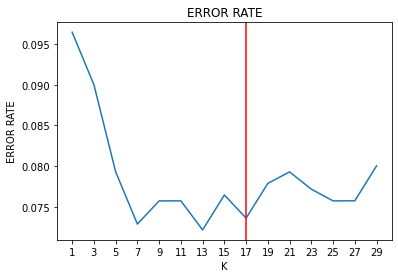

In [57]:
plt.plot(range(1,30,2), error)
plt.title('ERROR RATE')
plt.xlabel('K')
plt.ylabel('ERROR RATE')
plt.xticks(np.arange(1,30,2))
plt.axvline(x = 17, color = 'r')

In [58]:
error_rate = []
import numpy as np
for i in range(1,30,2):
    knn = KNeighborsClassifier(i,metric = 'euclidean')
    score = cross_val_score(knn,x_train,y_train ,cv = 5)
    score = score.mean()
    error_rate.append(1 - score)

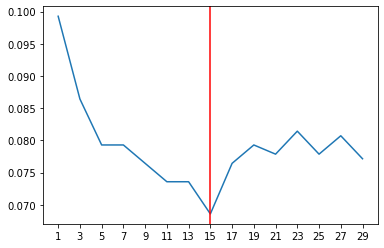

In [59]:
plt.plot(range(1,30,2), error_rate)
plt.xticks(np.arange(1,31,2))
plt.axvline(x = 15, color = 'r')
plt.show()

#  by scaling data

In [60]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
x_train  = stnd.fit_transform(x_train)
x_test = stnd.transform(x_test)

In [61]:
shape(x_train,x_test,y_train,y_test)

x_train :  (1400, 14)
x_test : (600, 14)
y_train : (1400, 1)
y_test : (600, 1)


In [62]:
knn =KNeighborsClassifier(n_neighbors = 17)
knn_model = knn.fit(x_train,y_train)

In [63]:
y_predict = knn_model.predict(x_test)

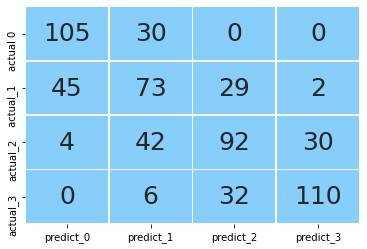

In [64]:
confusion_matrices(knn_model)

In [65]:
report(knn_model)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       135
           1       0.48      0.49      0.49       149
           2       0.60      0.55      0.57       168
           3       0.77      0.74      0.76       148

    accuracy                           0.63       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.63      0.63      0.63       600



In [66]:
model_3 = metrics.accuracy_score(y_test,y_predict)

# ADABOOST

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ADABOOST = AdaBoostClassifier(random_state= 1)
ADABOOST_mdl = ADABOOST.fit(x_train,y_train)

In [68]:
y_predict = ADABOOST_mdl.predict(x_test)

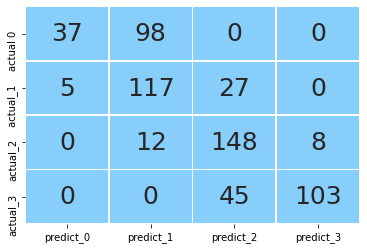

In [69]:
confusion_matrices(ADABOOST_mdl)

In [70]:
report(ADABOOST_mdl)

              precision    recall  f1-score   support

           0       0.88      0.27      0.42       135
           1       0.52      0.79      0.62       149
           2       0.67      0.88      0.76       168
           3       0.93      0.70      0.80       148

    accuracy                           0.68       600
   macro avg       0.75      0.66      0.65       600
weighted avg       0.74      0.68      0.66       600



In [71]:
model_4 = metrics.accuracy_score(y_test,y_predict)

# BAGGING

In [95]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [96]:
bagging_model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))

In [97]:
bagging_model = bagging_model.fit(x_train,y_train)

In [98]:
y_predict = bagging_model.predict(x_test)

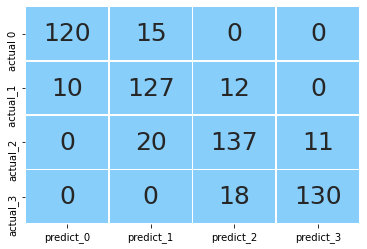

In [99]:
confusion_matrices(bagging_model)

In [100]:
report(bagging_model)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       135
           1       0.78      0.85      0.82       149
           2       0.82      0.82      0.82       168
           3       0.92      0.88      0.90       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [101]:
model_5 = metrics.accuracy_score(y_test,y_predict)

# XGBOOST

In [102]:
from xgboost.sklearn import XGBClassifier

In [103]:
xgboost = XGBClassifier(random_state = 1)
xgboost = xgboost.fit(x_train,y_train)

[23:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
y_predict = xgboost.predict(x_test)

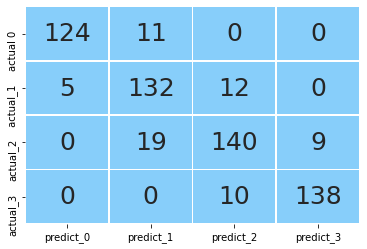

In [105]:
confusion_matrices(xgboost)

In [106]:
report(xgboost)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       135
           1       0.81      0.89      0.85       149
           2       0.86      0.83      0.85       168
           3       0.94      0.93      0.94       148

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [107]:
model_6 = metrics.accuracy_score(y_test,y_predict)

# final models accuracy

In [108]:
print('accuracy_model_1 - K NN',model_1)
print('accuracy_model_2 - K NN using grid search',model_2)
print('accuracy_model_3 k-nn by scaling ',model_3)
print('accuracy_model_4 ADA BOOST',model_4)
print('accuracy_model_5 BAGGING TECHNIQUES ',model_5)
print('accuracy model_ 5 XGBOOST , ', model_6)

accuracy_model_1 - K NN 0.9133333333333333
accuracy_model_2 - K NN using grid search 0.9166666666666666
accuracy_model_3 k-nn by scaling  0.6333333333333333
accuracy_model_4 ADA BOOST 0.675
accuracy_model_5 BAGGING TECHNIQUES  0.8566666666666667
accuracy model_ 5 XGBOOST ,  0.89
